In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
def generate_sample(samples, maxvalue=100):
    Xs = np.random.rand(samples)*maxvalue
    Ys = np.random.rand(samples)*maxvalue
    return Xs, Ys

In [122]:
#Pseudo inversa -> retorna os coeficientes do polinômio de grau N
def pinv(Xs, Ys, N):
    b = Ys.T
    A = np.vander(Xs, N)
    A_inv = np.linalg.pinv(A)
    return np.dot(A_inv,b)

In [123]:
#thikonov -> retorna os coeficientes do polinômio de grau N
def thikonov(Xs, Ys, N, alpha):
    b = Ys.T
    A = np.vander(Xs, N)
    ATA = np.dot(A.T,A)
    aI = alpha*np.eye(*ATA.shape)
    ATb = np.dot(A.T,b)
    return np.linalg.solve(ATA+aI,ATb)

In [129]:
def plot(Xs, Ys, coef, c="b", plot=False):
    x = np.arange(0, max(Xs)+0.01, 0.01)
    vand = np.vander(x, coef.shape[0])
    y = np.dot(vand,coef)
    plt.plot(x, y, color=c)
    plt.plot(Xs,Ys,'ro')
    if plot:
        plt.show()

In [138]:
def test(N, samples, maxvalue):
    Xs, Ys = generate_sample(samples, maxvalue)
    coef_pinv = pinv(Xs, Ys, N)
    coef_thi1 = thikonov(Xs, Ys, N, 1)
    coef_thi2 = thikonov(Xs, Ys, N, 0.5)
    coef_thi3 = thikonov(Xs, Ys, N, 0.01)
    plot(Xs, Ys, coef_pinv, "y")
    plot(Xs, Ys, coef_thi1, "b")
    plot(Xs, Ys, coef_thi2, "r")
    plot(Xs, Ys, coef_thi3, "g", True)

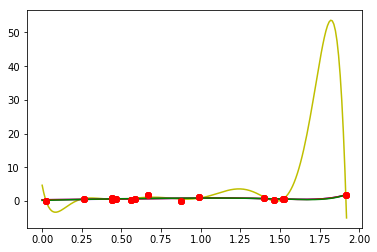

In [143]:
N = 10
samples = 15
maxvalue = 2
test(N, samples, maxvalue)

Comparando a curva da pseudoinversa(amarelo) com as curvas do método de thikonov, percebe-se uma enorme variância devido ao auto grau do polinômio. Este fenômeno é chamado de overfitting, pois embora a curva passe com uma boa precisão pelos pontos, ela possui um comportamento descontrolado entre os pontos dado, aumentando a probabilidade de erro para novos exemplos.

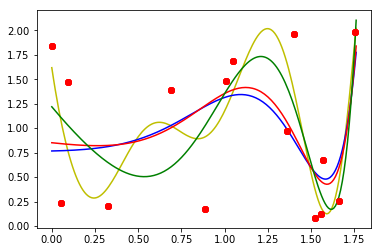

In [144]:
test(N, samples, maxvalue)

Temos um gráfico com 15 pontos com cordenadas (x,y) que pertendem a um intervalo (0,2).
A curva amarela é a pseudoinversa, utilizando um polinômio de 10 graus para aproximar a curva. Podemos notar a alta variância devido ao grau elevado do polinômio. Ao utilizar o método de thikonov, podemos ver uma curva mais suave, o verde que possúi menor alpha ainda contém uma variação maior que o vermelhor e azul, cujo o alpha é menor.